### Import the necessary libraries

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

### Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [52]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')


### First look at its main features (head, shape, info)

In [53]:
display(customer_df.shape)
display(customer_df.tail())
display(customer_df.head())
#customer_df.head()



(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [54]:
cols = []
for column in customer_df.columns:
    cols.append(column.lower())
customer_df.columns = cols

In [55]:
customer_df.columns = customer_df.columns.str.replace(' ','_')

In [56]:
display(customer_df.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Change effective to date column to datetime format.

In [57]:
customer_df['effective_to_date'] =  pd.to_datetime(customer_df['effective_to_date'], infer_datetime_format=True)

In [58]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [59]:
len(customer_df)-len(customer_df.drop_duplicates())

0

In [60]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [61]:
col = []
numerical_cols = customer_df.select_dtypes(np.number)
for col in numerical_cols.columns:
    print(col, ': ',numerical_cols[col].nunique())
 
    

customer_lifetime_value :  8041
income :  5694
monthly_premium_auto :  202
months_since_last_claim :  36
months_since_policy_inception :  100
number_of_open_complaints :  6
number_of_policies :  9
total_claim_amount :  5106


In [62]:
def extract_cv_dv(df):
    cv = []
    dv = []
    for col in df.select_dtypes(np.number).columns:
        if(df[col].nunique() > 10):
            cv.append(col)
        else:
            dv.append(col)
    return cv, dv
continous_df, discrete_df = extract_cv_dv(customer_df)
continous_df = customer_df[continous_df]
continous_df
discrete_df = customer_df[discrete_df]
discrete_df

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


### Plot a correlation matrix, comment what you see

In [63]:
numeric_data = customer_df.select_dtypes(include=[np.number])
numeric_data



,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


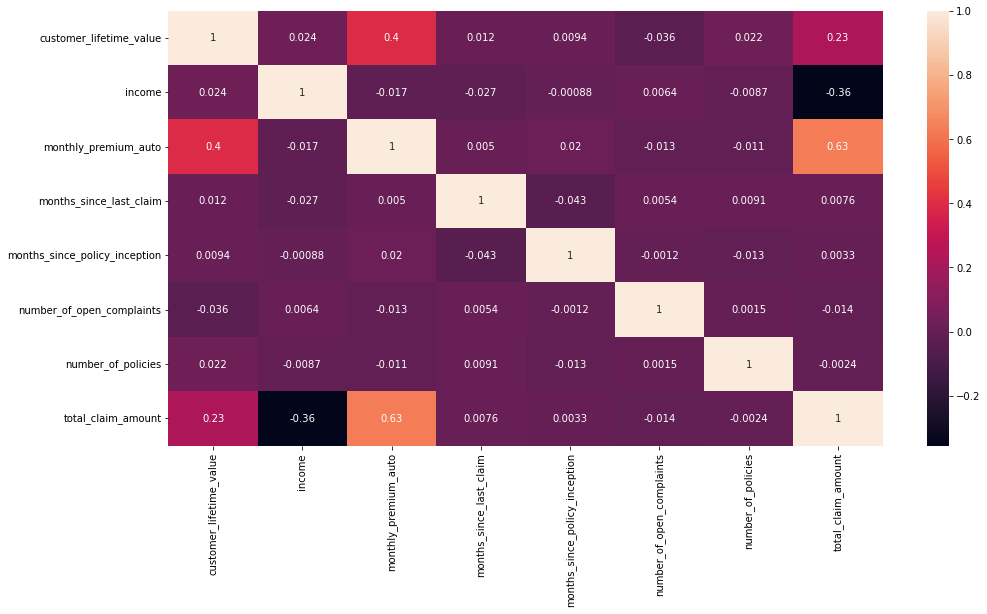

In [64]:
fig, ax = plt.subplots(figsize=(16,8))
cr = sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

### Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

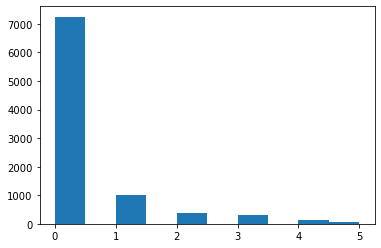

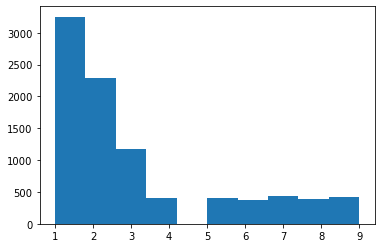

In [65]:
for i in discrete_df.columns:
    plt.figure()
    plt.hist(discrete_df[i])

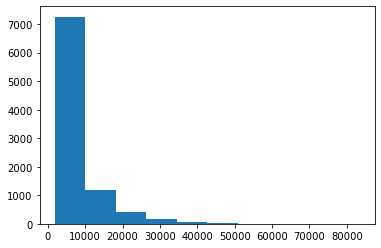

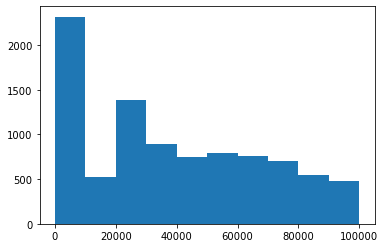

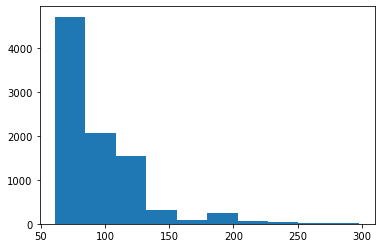

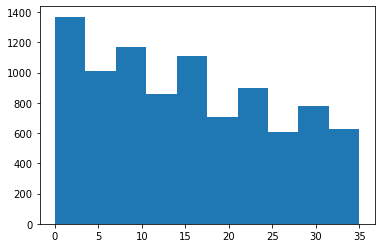

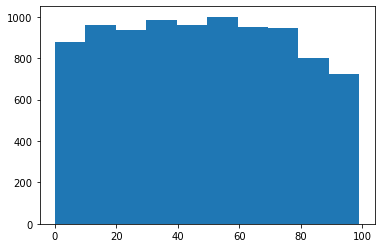

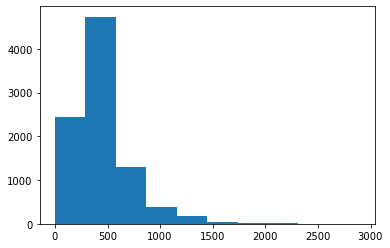

In [66]:
for i in continous_df.columns:
    plt.figure()
    plt.hist(continous_df[i])

### Comment what you can see in the plots.

### Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

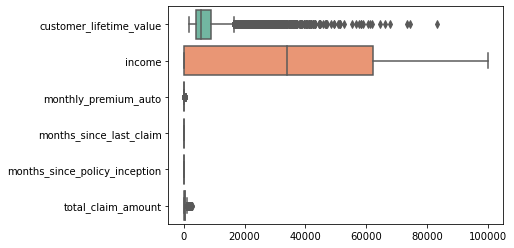

In [67]:
ax = sns.boxplot(data=continous_df, orient="h", palette="Set2")

### Did you find outliers? Comment what you will do with them

##### only in the column "customer_lifetime_value". I will not drop the outliers from customer_lifetime_value  because the information could be usefull

### Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [68]:
numeric_data.isnull().sum().sum()

0

#####  there are not Null values in the whole Dataset

# Lab | Cleaning categorical data

### Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

### Find all of the categorical data. Save it in a categorical_df variable

In [69]:
categorical_df = customer_df.select_dtypes(['object']) 
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### Check for NaN values.

In [70]:
#categorical_df.isnull().sum().sum()
categorical_df.isna().sum() #there are not Nun values

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

### Check all unique values of columns.

In [71]:
print(categorical_df.apply(lambda col: col.unique()))
categorical_df.head()

customer            [BU79786, QZ44356, AI49188, WW63253, HB64268, ...
state               [Washington, Arizona, Nevada, California, Oregon]
response                                                    [No, Yes]
coverage                                   [Basic, Extended, Premium]
education           [Bachelor, College, Master, High School or Bel...
employmentstatus    [Employed, Unemployed, Medical Leave, Disabled...
gender                                                         [F, M]
location_code                                [Suburban, Rural, Urban]
marital_status                            [Married, Single, Divorced]
policy_type             [Corporate Auto, Personal Auto, Special Auto]
policy              [Corporate L3, Personal L3, Corporate L2, Pers...
renew_offer_type                     [Offer1, Offer3, Offer2, Offer4]
sales_channel                       [Agent, Call Center, Web, Branch]
vehicle_class       [Two-Door Car, Four-Door Car, SUV, Luxury SUV,...
vehicle_size        

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [72]:
categorical_df[['state']].value_counts()


state     
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
dtype: int64

In [73]:
categorical_df[['response']].value_counts()

response
No          7826
Yes         1308
dtype: int64

In [74]:
categorical_df[['coverage']].value_counts()

coverage
Basic       5568
Extended    2742
Premium      824
dtype: int64

In [75]:
categorical_df[['education']].value_counts()

education           
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
dtype: int64

In [76]:
categorical_df[['employmentstatus']].value_counts()

employmentstatus
Employed            5698
Unemployed          2317
Medical Leave        432
Disabled             405
Retired              282
dtype: int64

In [77]:
categorical_df[['gender']].value_counts()

gender
F         4658
M         4476
dtype: int64

In [78]:
categorical_df[['location_code']].value_counts()

location_code
Suburban         5779
Rural            1773
Urban            1582
dtype: int64

In [79]:
categorical_df[['marital_status']].value_counts()

marital_status
Married           5298
Single            2467
Divorced          1369
dtype: int64

In [80]:
categorical_df[['policy_type']].value_counts()

policy_type   
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
dtype: int64

In [81]:
categorical_df[['policy']].value_counts()

policy      
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
dtype: int64

In [82]:
categorical_df[['renew_offer_type']].value_counts()

renew_offer_type
Offer1              3752
Offer2              2926
Offer3              1432
Offer4              1024
dtype: int64

In [83]:
categorical_df[['vehicle_class']].value_counts()

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
dtype: int64

In [84]:
categorical_df[['vehicle_size']].value_counts()

vehicle_size
Medsize         6424
Small           1764
Large            946
dtype: int64

In [85]:
categorical_df[['sales_channel']].value_counts()

sales_channel
Agent            3477
Branch           2567
Call Center      1765
Web              1325
dtype: int64

### Check dtypes. Do they all make sense as categorical data?

##### yes, the number of unique values is properly correct for the data.

### Does any column contain alpha and numeric data? Decide how to clean it

In [86]:
categorical_df.dtypes 

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

the only column would be "customer" but I will not drop it because we can use it to identify better each customer.

### Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

I would leave the data as we have without making any changes.

### Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

##### describe the kind of policy for each person.  the column "Policy"  would be the most important because of the description seems to be more specific though it will depend on our target. 

### Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes

##### I would say no, there not would make sense to combine any row

# Lab | Feature extraction

## Open the categoricals variable we created before.

In [87]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

C:\Users\Manuel Buendía\AppData\Local\Temp\ipykernel_16832\2044039042.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Plot all the categorical variables with the proper plot. What can you see?

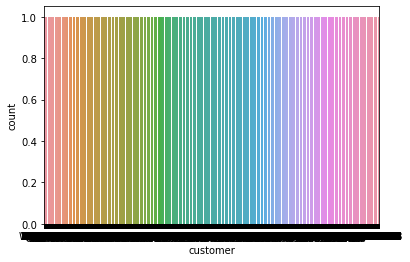

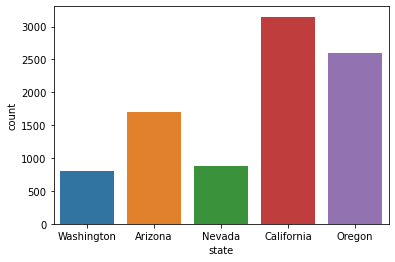

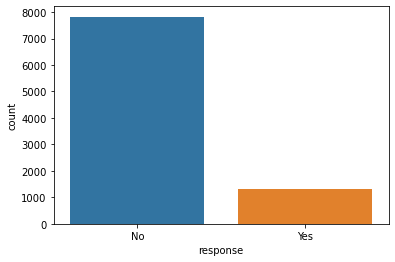

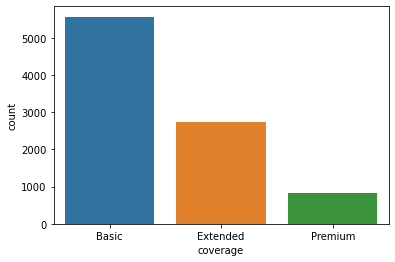

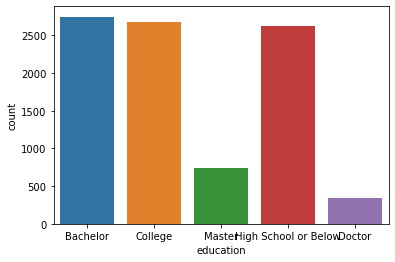

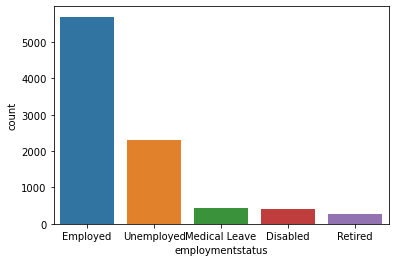

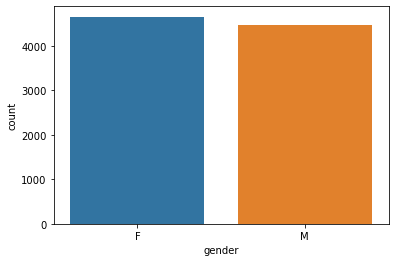

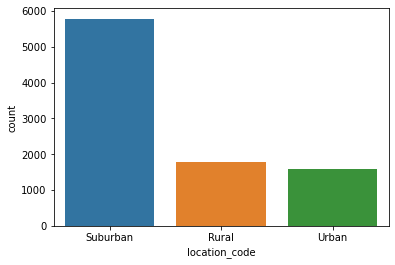

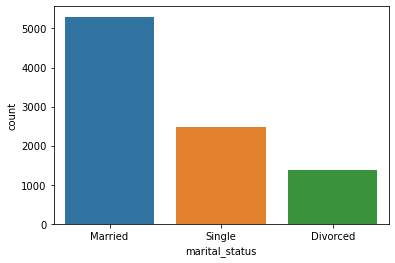

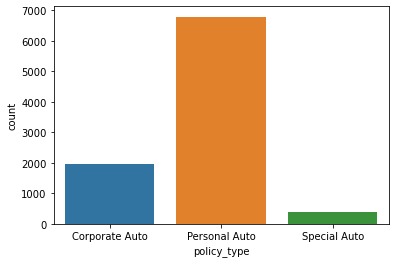

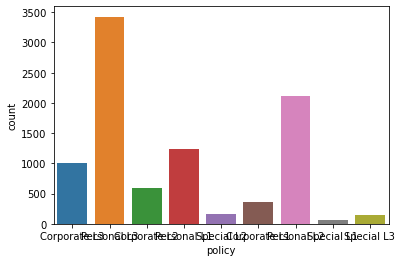

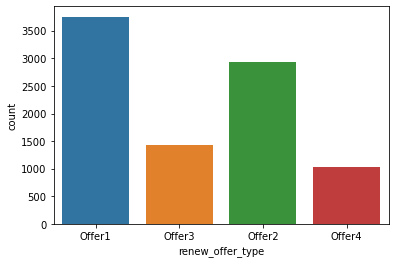

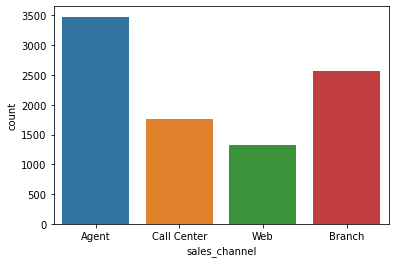

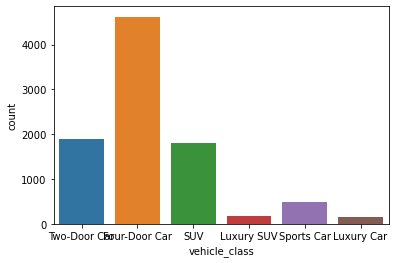

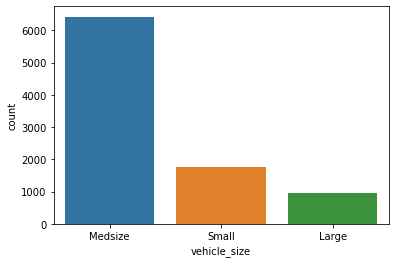

In [88]:
for column in categoricals.columns:
    sns.countplot(x=categoricals[column])
    plt.show()

### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [89]:
# I will only drop a column (policy_type)
customer_df = customer_df.drop(['policy'], axis=1)


In [92]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

C:\Users\Manuel Buendía\AppData\Local\Temp\ipykernel_16832\2044039042.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


### Plot time variable. Can you extract something from it?

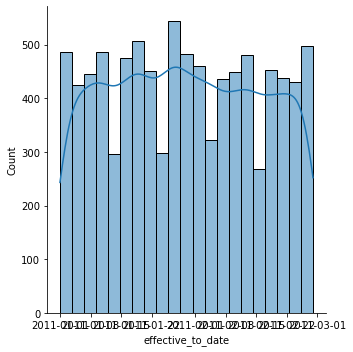

In [93]:
sns.displot(customer_df['effective_to_date'], kde=True)
plt.show()